In [3]:
import pandas as pd
print(pd.__version__)

1.0.1


In [4]:
%matplotlib inline

# Merge Two Datasets

In [5]:
df = pd.DataFrame()

df1 = pd.read_csv('D:\Works\BI\dataset1.csv')
header = list(df1.columns)

df2 = pd.read_csv('D:\Works\BI\dataset2.csv',names=header)

df = pd.concat([df,df1],sort=False,ignore_index=True)
df = pd.concat([df,df2],sort=False,ignore_index=True)

# df.to_csv("D:\Works\BI\dataset.csv")


Make sure two dataframe merged successfully

In [6]:
df1.shape

(753089, 9)

In [7]:
df2.shape

(753444, 9)

In [8]:
df2.tail()

,broker,city,territory,fund_category,email_opened,digitalevent_attended,sales_callormet,client_x_sales,global_sales
753439,AAG1,"ALBANY, NY",I10,Foreign Large Value,Y,NaN,Y,41.4,10810.23
753440,ABI9,"KANSAS CITY, MO",I47,Allocation--50% to 70% Equity,Y,NaN,NaN,0.0,359947.33
753441,AXD9,"SPOONER, WI",I52,Short-Term Bond,NaN,NaN,NaN,0.0,80997.20
753442,AAG1,"GERMANTOWN HILLS, IL",I30,Diversified Emerging Mkts,NaN,NaN,Y,0.0,95665.82
753443,AAG1,"PARIS, TN",I23,Muni National Long,Y,NaN,NaN,0.0,1332.76


In [9]:
df.head()

,broker,city,territory,fund_category,email_opened,digitalevent_attended,sales_callormet,client_x_sales,global_sales
0,AEQ4,"PLANTATION, FL",I15,Emerging-Markets Local-Currency Bond,NaN,NaN,NaN,174.62,174.62
1,AEQ4,"BRANFORD, CT",I25,Utilities,NaN,NaN,NaN,0.00,0.00
2,AEQ4,"JONESBORO, GA",I14,Intermediate Government,NaN,NaN,NaN,0.00,0.00
3,ASR7,"VIENNA, VA",I13,Intermediate Government,Y,NaN,NaN,0.00,30709.00
4,AAK9,"CHAGRIN FALLS, OH",W28,Target-Date 2050,Y,NaN,Y,0.00,0.00


In [10]:
df.tail()

,broker,city,territory,fund_category,email_opened,digitalevent_attended,sales_callormet,client_x_sales,global_sales
1506528,AAG1,"ALBANY, NY",I10,Foreign Large Value,Y,NaN,Y,41.4,10810.23
1506529,ABI9,"KANSAS CITY, MO",I47,Allocation--50% to 70% Equity,Y,NaN,NaN,0.0,359947.33
1506530,AXD9,"SPOONER, WI",I52,Short-Term Bond,NaN,NaN,NaN,0.0,80997.20
1506531,AAG1,"GERMANTOWN HILLS, IL",I30,Diversified Emerging Mkts,NaN,NaN,Y,0.0,95665.82
1506532,AAG1,"PARIS, TN",I23,Muni National Long,Y,NaN,NaN,0.0,1332.76


#### Two datasets merged successfully

# Firm X and Other Elements:Data Anaylisis

#### According to the case study, those which affect firm x's sales force are city,territory and fund_category

## Q1. What was the best state for firm x sales?

### Add state column

In [11]:
df['state'] = df['city'].apply(lambda x: x.split(',')[1])
df.head()

,broker,city,territory,fund_category,email_opened,digitalevent_attended,sales_callormet,client_x_sales,global_sales,state
0,AEQ4,"PLANTATION, FL",I15,Emerging-Markets Local-Currency Bond,NaN,NaN,NaN,174.62,174.62,FL
1,AEQ4,"BRANFORD, CT",I25,Utilities,NaN,NaN,NaN,0.00,0.00,CT
2,AEQ4,"JONESBORO, GA",I14,Intermediate Government,NaN,NaN,NaN,0.00,0.00,GA
3,ASR7,"VIENNA, VA",I13,Intermediate Government,Y,NaN,NaN,0.00,30709.00,VA
4,AAK9,"CHAGRIN FALLS, OH",W28,Target-Date 2050,Y,NaN,Y,0.00,0.00,OH


In [12]:
state_x_sales = df.groupby('state').sum()['client_x_sales']
states = state_x_sales.index

In [13]:
len(states)

54

### Visualize the relation

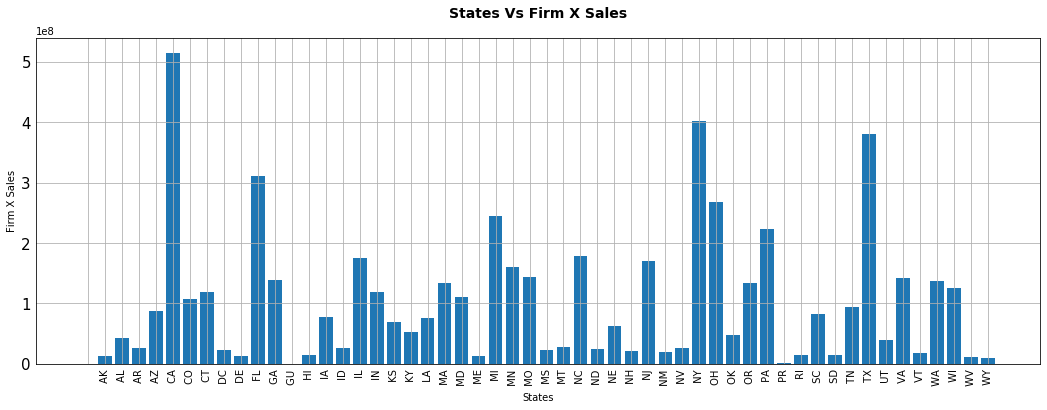

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,6))
plt.bar(states, state_x_sales )
plt.tick_params(axis=u'both',which=u'both',length=0,pad=5)
plt.yticks(fontsize=15)
plt.ylabel('Firm X Sales')
plt.xticks(rotation=90)
plt.xlabel('States')
plt.title('States Vs Firm X Sales', fontsize=14,pad=20,fontweight="bold")
plt.grid()
plt.show()

### What is the best state for firm x?

In [15]:
max_state = state_x_sales.idxmax()
print("The best state for firm x is",max_state)

The best state for firm x is  CA


## Q2. What is the best territory for firm x sale?

In [16]:
territory_x_sales = df.groupby('territory').sum()['client_x_sales']
territories = territory_x_sales.index

### Visualize them

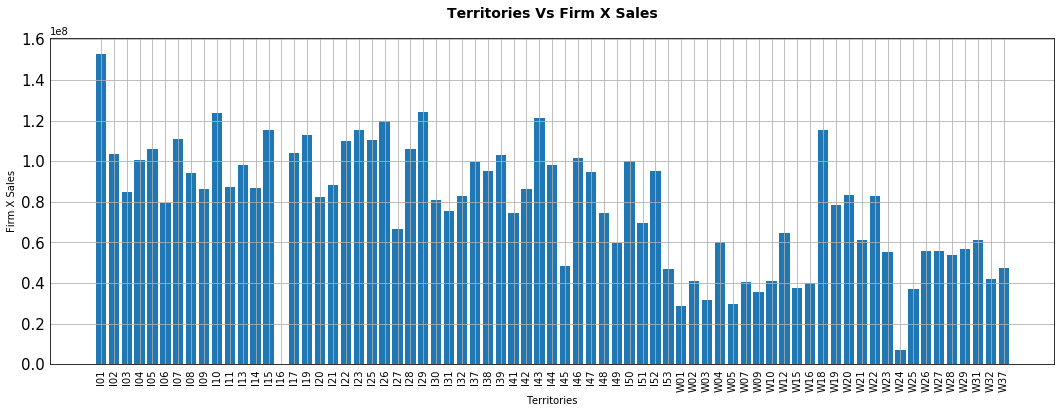

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,6))
plt.bar(territory_x_sales.index, territory_x_sales)
plt.tick_params(axis=u'both',which=u'both',length=0,pad=5)
plt.yticks(fontsize=15)
plt.ylabel('Firm X Sales')
plt.xticks(rotation=90)
plt.xlabel('Territories')
plt.title('Territories Vs Firm X Sales', fontsize=14,pad=20,fontweight="bold")
plt.grid()
plt.show()

### What is the best territory for firm x?

In [18]:
max_territory = territory_x_sales.idxmax()
print("The best territory for firm x is",max_territory)

The best territory for firm x is I01


## Q3.What is the best fund category for firm x sales?

In [19]:
fund_x_sales = df.groupby('fund_category').sum()['client_x_sales']
funds = fund_x_sales.index

### Visualize them

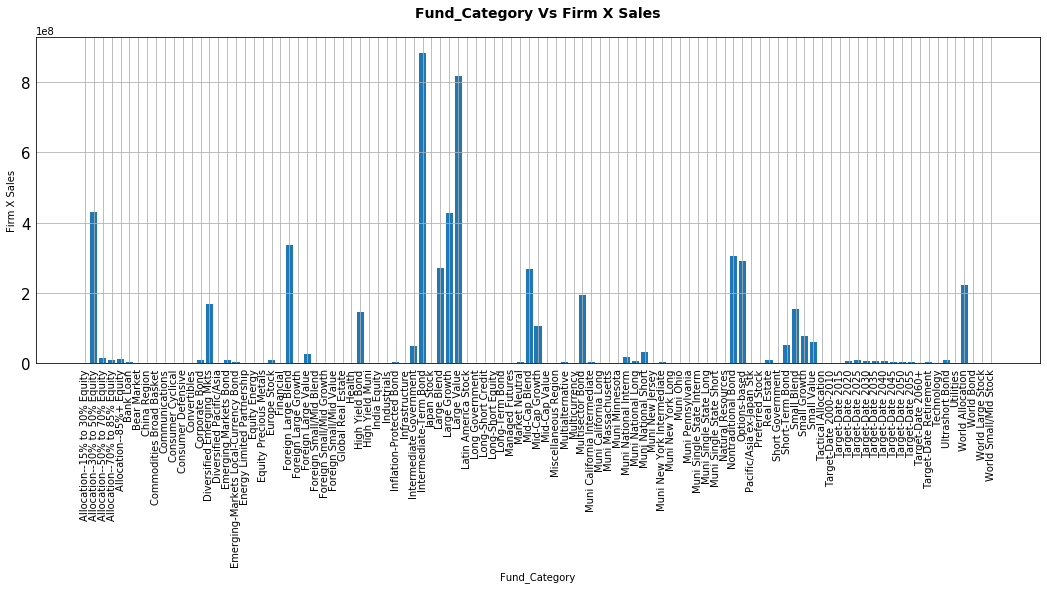

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,6))
plt.bar(funds, fund_x_sales)
plt.tick_params(axis=u'both',which=u'both',length=0,pad=5)
plt.yticks(fontsize=15)
plt.ylabel('Firm X Sales')
plt.xticks(rotation=90)
plt.xlabel('Fund_Category')
plt.title('Fund_Category Vs Firm X Sales', fontsize=14,pad=20,fontweight="bold")
plt.grid()
plt.show()

### What is the best fund for firm x?

In [21]:
max_fund = fund_x_sales.idxmax()
print("The best territory for firm x is",max_fund)


The best territory for firm x is Intermediate-Term Bond


## Q4. Relation between Email And Global Sales?

### Replace all NaN value with string 'N'.(Here 'N' stands for 'No')

In [22]:
import numpy as np
df = df.replace(np.nan, 'N', regex=True)
df.head()

,broker,city,territory,fund_category,email_opened,digitalevent_attended,sales_callormet,client_x_sales,global_sales,state
0,AEQ4,"PLANTATION, FL",I15,Emerging-Markets Local-Currency Bond,N,N,N,174.62,174.62,FL
1,AEQ4,"BRANFORD, CT",I25,Utilities,N,N,N,0.00,0.00,CT
2,AEQ4,"JONESBORO, GA",I14,Intermediate Government,N,N,N,0.00,0.00,GA
3,ASR7,"VIENNA, VA",I13,Intermediate Government,Y,N,N,0.00,30709.00,VA
4,AAK9,"CHAGRIN FALLS, OH",W28,Target-Date 2050,Y,N,Y,0.00,0.00,OH


#### To see the whether N or Y is better for our sale?

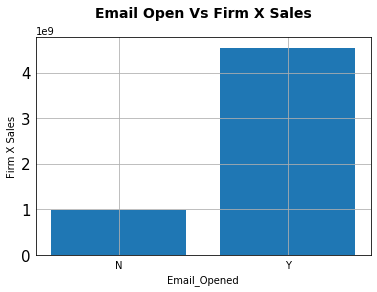

In [23]:
emails = df.groupby('email_opened').sum()['client_x_sales']
YNs = emails.index

plt.bar(YNs, emails)
plt.tick_params(axis=u'both',which=u'both',length=0,pad=5)
plt.yticks(fontsize=15)
plt.ylabel('Firm X Sales')
plt.xlabel('Email_Opened')
plt.title('Email Open Vs Firm X Sales', fontsize=14,pad=20,fontweight="bold")
plt.grid()
plt.show()

### From the chart above we can make sure it is needed to open emails for better flow 

## Q5. Digital Event And Firm x Sales Force?

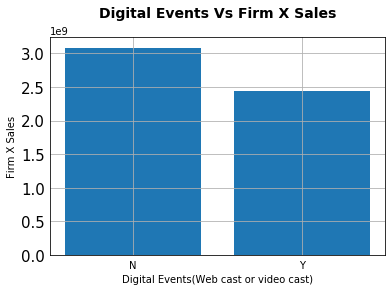

In [24]:
events_result = df.groupby('digitalevent_attended').sum()['client_x_sales']
events = events_result.index

plt.bar(events, events_result)
plt.tick_params(axis=u'both',which=u'both',length=0,pad=5)
plt.yticks(fontsize=15)
plt.ylabel('Firm X Sales')
plt.xlabel('Digital Events(Web cast or video cast)')
plt.title('Digital Events Vs Firm X Sales', fontsize=14,pad=20,fontweight="bold")
plt.grid()
plt.show()

### From the chart above, it seems that there is no need to attend in digital event to elevate sales force

## Q6. Does it need sales engagement?

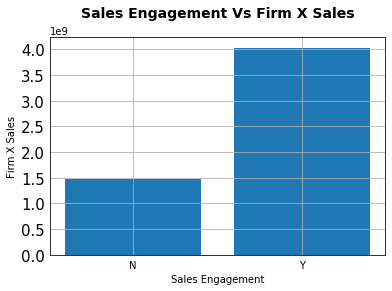

In [25]:
sales_engagements = df.groupby('sales_callormet').sum()['client_x_sales']
events = sales_engagements.index

plt.bar(events, sales_engagements)
plt.tick_params(axis=u'both',which=u'both',length=0,pad=5)
plt.yticks(fontsize=15)
plt.ylabel('Firm X Sales')
plt.xlabel('Sales Engagement')
plt.title('Sales Engagement Vs Firm X Sales', fontsize=14,pad=20,fontweight="bold")
plt.grid()
plt.show()

### From the chart, it is strongly needed to elevate sales force to engage in sales

# How can we decide strategy?

## Ans1. There is no need to invest to the city where client_x_sales are 0

### Remove all rows where firm x sales equal 0

In [26]:
df = df[df['client_x_sales'] != 0]

In [27]:
len(df['client_x_sales'])

109920

In [28]:
df.head()

,broker,city,territory,fund_category,email_opened,digitalevent_attended,sales_callormet,client_x_sales,global_sales,state
0,AEQ4,"PLANTATION, FL",I15,Emerging-Markets Local-Currency Bond,N,N,N,174.62,174.62,FL
11,AAK9,"NEW YORK, NY",W18,Target-Date 2045,Y,Y,Y,10880.65,71979.50,NY
15,AAK9,"GREENSBORO, NC",W21,Intermediate Government,Y,Y,Y,4148.24,272847.94,NC
26,AAK9,"NORTH BETHESDA, MD",W20,Mid-Cap Blend,Y,Y,Y,5229.00,1520620.75,MD
36,AAK9,"PENSACOLA, FL",W25,Nontraditional Bond,Y,N,Y,717.45,57371.80,FL


In [29]:
df.tail()

,broker,city,territory,fund_category,email_opened,digitalevent_attended,sales_callormet,client_x_sales,global_sales,state
1506487,AAG1,"YORK, PA",I09,Target-Date 2060+,Y,N,Y,240.00,240.00,PA
1506501,AAG1,"ARKADELPHIA, AR",I41,Mid-Cap Blend,Y,N,N,16783.10,62157.77,AR
1506506,AAG1,"BETHANY, MO",I47,Large Value,N,N,Y,526.45,61878.30,MO
1506520,AAG1,"MOUNT VERNON, OH",I22,Small Growth,Y,N,Y,5344.15,24357.60,OH
1506528,AAG1,"ALBANY, NY",I10,Foreign Large Value,Y,N,Y,41.40,10810.23,NY


## This dataframe is the thing we should consider for strategy

### Sort the dataframe according to the firm x sales(client_x_sales)

In [30]:
df.sort_values('client_x_sales')

,broker,city,territory,fund_category,email_opened,digitalevent_attended,sales_callormet,client_x_sales,global_sales,state
443752,AHH0,"VENTURA, CA",I03,High Yield Bond,N,N,N,0.01,599.39,CA
849360,AIX6,"ISELIN, NJ",I49,Intermediate-Term Bond,N,N,N,0.01,0.01,NJ
41840,AIX6,"ISELIN, NJ",I49,Large Value,N,N,N,0.01,0.01,NJ
1078469,AIX6,"ISELIN, NJ",I49,Small Blend,N,N,N,0.01,0.01,NJ
874916,AIX6,"ISELIN, NJ",I49,Mid-Cap Growth,N,N,N,0.01,0.01,NJ
...,...,...,...,...,...,...,...,...,...,...
822037,ALW6,"KNOXVILLE, TN",I23,Mid-Cap Growth,Y,N,Y,12763386.00,13248394.75,TN
1372719,AAX2,"SAINT LOUIS, MO",I07,Large Growth,Y,Y,Y,13214790.34,13972178.82,MO
19298,AZM4,"CLEVELAND, OH",I43,Intermediate Government,Y,Y,Y,15684523.98,15684523.98,OH
1014326,AAD4,"PEACHTREE CITY, GA",W22,Intermediate-Term Bond,Y,Y,Y,21089211.55,26701597.09,GA


## Get the correlation between firm x sales and global sales

In [31]:
df['client_x_sales'].corr(df['global_sales'])

0.41375299156864964

There is no rule for determining what size of correlation is considered strong, moderate or weak. The interpretation of the coefficient depends, in part, on the topic of study. When we are studying things that are difficult to measure,we generally consider correlations above 0.4 to be relatively strong; correlations between 0.2 and 0.4 are moderate, and those below 0.2 are considered weak

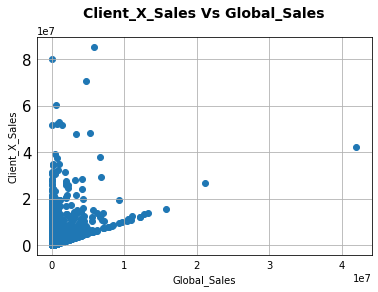

In [32]:
plt.scatter(df['client_x_sales'],df['global_sales'])
plt.tick_params(axis=u'both',which=u'both',length=0,pad=5)
plt.yticks(fontsize=15)
plt.ylabel('Client_X_Sales')
plt.xlabel('Global_Sales')
plt.title('Client_X_Sales Vs Global_Sales', fontsize=14,pad=20,fontweight="bold")
plt.grid()
plt.show()

### Get the statistical data of firm x sales

In [33]:
df['client_x_sales'].describe()

count    1.099200e+05
mean     5.021643e+04
std      2.696790e+05
min      1.000000e-02
25%      8.709975e+02
50%      6.115200e+03
75%      3.000000e+04
max      4.203690e+07
Name: client_x_sales, dtype: float64

#### Count: Here count means the whole number of client x sales whose value is not 0.
#### Mean: Mean stands for the average value of the whole client x sales values.
#### Std: Here std stands for standard deviation which means how the values of client x sales are spread out.
#### Min: Minimum value of the whole client x sales whose values are not 0.
#### 25%(Percentile): the 25th percentile is the value below which 25% of the observations of client x sales may be found. 
#### 50%(Percentile): the 50th percentile is the value below which 50% of the observations of client x sales may be found. 
#### 75%(Percentile): the 75th percentile is the value below which 75% of the observations of client x sales may be found. 
#### Max: The biggest sales among the whole client x sales.

In [34]:
df['client_x_sales'].median()

6115.2

#### Median value stands for middle value of client x sales force list.

# How to increase firm flow and elevate market share?

### Get the maximum firm_x_sales according to the fund_category

In [47]:
opt_df = df.groupby(['city','territory','fund_category']).agg({'client_x_sales':'max'})
opt_df

client_x_sales
city              territory fund_category                                       
15801, PA         I09       Corporate Bond                               1684.01
                            Diversified Emerging Mkts                   21907.99
                            Emerging Markets Bond                         662.37
                            Emerging-Markets Local-Currency Bond          744.67
                            Foreign Large Blend                        160313.60
...                                                                          ...
ZUMBROTA, MN      I52       Intermediate-Term Bond                     131281.36
                            Large Growth                                 8216.25
                            Large Value                                 29035.84
                            Mid-Cap Blend                               28676.71
​GRAND RAPIDS, MI I50       Intermediate-Term Bond                    1341200.00

[68374 rows x 1 columns]

In [69]:
sales = opt_df.loc[('15801, PA'),:]
sales.style.highlight_max(color='red').highlight_min(color='lightblue')


### In the table above the red cell shows the maximum sales in a certain city and territory and it shows that in that city and territory, if we set the fund category as 'Foreign Large Blend', then we get the maxim sales force. So this is the strategy.

### Our next step is to find all 'good' fund for each city and territory

In [36]:
opt_df = df.groupby(['city','territory']).agg({'client_x_sales':'max'})
opt_df.columns = ['max_firm_x_sales']
opt_df = opt_df.reset_index()
opt_df

,city,territory,max_firm_x_sales
0,"15801, PA",I09,160313.60
1,"ABBEVILLE, LA",I44,28206.01
2,"ABBEVILLE, SC",I46,69749.36
3,"ABELINE, TX",I51,6515.97
4,"ABERDEEN, MD",I42,9456.95
...,...,...,...
7293,"ZIMMERMAN, MN",I17,61035.16
7294,"ZION, IL",I06,31740.00
7295,"ZIONSVILLE, IN",I21,328805.24
7296,"ZUMBROTA, MN",I52,131281.36


## Find optimal fund_category column(Which can increase the firm x salesforce)

In [37]:
category_column = []

for i in range(len(opt_df['city'])):
     index = df.loc[(df['city']==opt_df['city'][i])&(df['territory']==opt_df['territory'][i])&(df['client_x_sales']==opt_df['max_firm_x_sales'][i])].index[0]
     category_column.append(df.at[index,'fund_category'])
category_column


['Foreign Large Blend',
 'Diversified Emerging Mkts',
 'Large Value',
 'Large Blend',
 'Mid-Cap Growth',
 'Large Value',
 'Small Blend',
 'Large Blend',
 'Intermediate-Term Bond',
 'Muni National Short',
 'Allocation--30% to 50% Equity',
 'Intermediate-Term Bond',
 'High Yield Bond',
 'Large Growth',
 'Mid-Cap Blend',
 'Large Value',
 'Intermediate-Term Bond',
 'Large Growth',
 'Allocation--30% to 50% Equity',
 'Mid-Cap Blend',
 'Large Value',
 'Mid-Cap Blend',
 'Large Growth',
 'Intermediate-Term Bond',
 'Intermediate-Term Bond',
 'Intermediate-Term Bond',
 'Inflation-Protected Bond',
 'Diversified Emerging Mkts',
 'Options-based',
 'Large Growth',
 'Intermediate-Term Bond',
 'Mid-Cap Growth',
 'Intermediate-Term Bond',
 'Large Growth',
 'Market Neutral',
 'Intermediate-Term Bond',
 'Intermediate-Term Bond',
 'Intermediate-Term Bond',
 'Small Blend',
 'Intermediate-Term Bond',
 'Large Blend',
 'Nontraditional Bond',
 'Intermediate-Term Bond',
 'Large Value',
 'Foreign Large Blend',
 '

### Add fund_category column(which makes the firm_x_sales grow)

In [38]:
opt_df['fund_category'] = category_column
opt_df.head()


,city,territory,max_firm_x_sales,fund_category
0,"15801, PA",I09,160313.60,Foreign Large Blend
1,"ABBEVILLE, LA",I44,28206.01,Diversified Emerging Mkts
2,"ABBEVILLE, SC",I46,69749.36,Large Value
3,"ABELINE, TX",I51,6515.97,Large Blend
4,"ABERDEEN, MD",I42,9456.95,Mid-Cap Growth


In [39]:
opt_df.tail()

,city,territory,max_firm_x_sales,fund_category
7293,"ZIMMERMAN, MN",I17,61035.16,Intermediate-Term Bond
7294,"ZION, IL",I06,31740.00,Large Growth
7295,"ZIONSVILLE, IN",I21,328805.24,Intermediate-Term Bond
7296,"ZUMBROTA, MN",I52,131281.36,Intermediate-Term Bond
7297,"​GRAND RAPIDS, MI",I50,1341200.00,Intermediate-Term Bond


## The dataframe(opt_df) is the solution to help Firm X elevate its sales force. So the next time for the specific area, in order to elevate the firm x salesforce, we can decide which fund category to invest according to the table above. Ans Q4,Q5,Q6 can be the answer to elevate the firm x sales force and market share.